In [73]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns


In [75]:
df = pd.read_csv('cleaned_data.csv')

In [77]:
X = df['carat']
y = df['price']

In [81]:
correlation_matrix = df.corr()
correlation_matrix

,carat,cut,color,clarity,depth,table,price,x,y,z
carat,1.000000,-0.134967,0.291437,-0.352841,0.028224,0.181618,0.921591,0.975094,0.951722,0.953387
cut,-0.134967,1.000000,-0.020519,0.189175,-0.218055,-0.433405,-0.053491,-0.125565,-0.121462,-0.149323
color,0.291437,-0.020519,1.000000,0.025631,0.047279,0.026465,0.172511,0.270287,0.263584,0.268227
clarity,-0.352841,0.189175,0.025631,1.000000,-0.067384,-0.160327,-0.146800,-0.371999,-0.358420,-0.366952
depth,0.028224,-0.218055,0.047279,-0.067384,1.000000,-0.295779,-0.010647,-0.025289,-0.029341,0.094924
table,0.181618,-0.433405,0.026465,-0.160327,-0.295779,1.000000,0.127134,0.195344,0.183760,0.150929
price,0.921591,-0.053491,0.172511,-0.146800,-0.010647,0.127134,1.000000,0.884435,0.865421,0.861249
x,0.975094,-0.125565,0.270287,-0.371999,-0.025289,0.195344,0.884435,1.000000,0.974701,0.970772
y,0.951722,-0.121462,0.263584,-0.358420,-0.029341,0.183760,0.865421,0.974701,1.000000,0.952006
z,0.953387,-0.149323,0.268227,-0.366952,0.094924,0.150929,0.861249,0.970772,0.952006,1.000000


In [84]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [86]:
X_train = X_train.values.reshape(-1, 1)
X_test = X_test.values.reshape(-1, 1)

In [88]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [90]:
y_pred = model.predict(X_test)

In [92]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [94]:
print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'R²: {r2}')

MAE: 1009.5047420600889
MSE: 2401388.654479092
R²: 0.8489390686155809


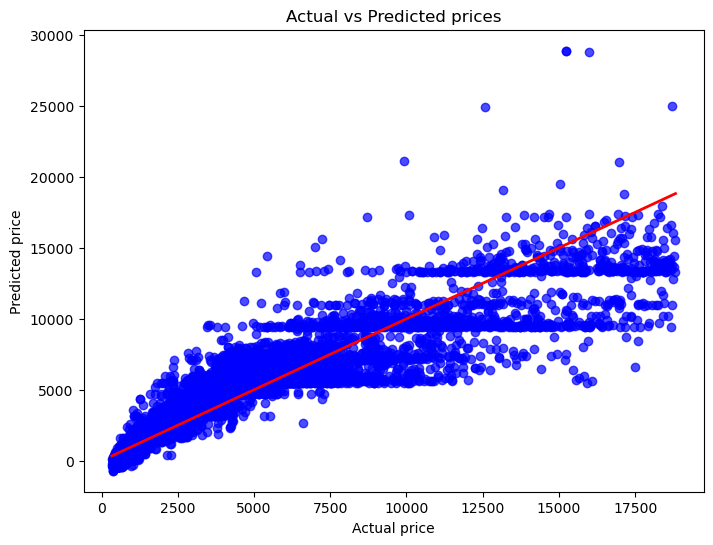

In [97]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='b')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='r', lw=2)
plt.xlabel('Actual price')
plt.ylabel('Predicted price')
plt.title('Actual vs Predicted prices')
plt.show()


In [100]:
mean_price = y_test.mean()

# MAE in percentage
mae_percentage = (mae / mean_price) * 100

print(f'Средняя цена: {mean_price}')
print(f'MAE в процентах от средней цены: {mae_percentage:.2f}%')


Средняя цена: 3906.0357804968485
MAE в процентах от средней цены: 25.84%
